## 1. Import data

In [1]:
import pandas as pd
data_path = 'data/central_west.csv'
df = pd.read_csv(data_path)

In [2]:
df.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,138998,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391,26.5,17.7,...,39,9.6,3.9,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306,26.6,16.7,...,55,8.3,3.4,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167,27.3,15.8,...,62,8.3,3.6,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279,27.5,12.9,...,43,6.7,3.1,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753,27.5,13.7,...,98,6.4,3.5,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


##### Clean data, fill missing values:

In [3]:
import numpy as np

metadata = pd.read_csv('data/columns_description.csv')
abbreviation = metadata.abbreviation

def process_raw(df):
    """
    ! drop index
    ! rename the columns
    ! combine hour and date columns -> transform to date_time
    ! append columns data from all stations to keep the data granularity
    ! remove unimportant columns
    ! return table 
    """
    df.drop(['index'],inplace=True, axis=1)
    df.columns = abbreviation
    df.drop(['regi','prov','wsnm','lat','lon','elvt'], inplace=True, axis=1)
    return df

def clean_na(df, na_value = -9999):
    """ 
    ! replace Na from dataset
    """
    df = df.replace(to_replace=na_value,value=np.NaN)
    df = df[df.iloc[:,1].first_valid_index():]
    df = df.ffill()
    return df

# minimum date: 2000-05-07
# maximum date: 2021-04-30
def make_dataset(start_date, end_date, df):
    """
    ! filter raw data from date and stations code
    ! process data
    ! clean na
    """
    df = df[(df.Data >= start_date) & (df.Data <= end_date)]
    df = process_raw(df)
    df = clean_na(df)
    return df.reset_index()

# only take data from 2001-2020 (20 years)
df = make_dataset(start_date='2001-01-01', end_date='2020-12-31', df=df) 

/tmp/ipykernel_1441/2075609048.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index'],inplace=True, axis=1)
/tmp/ipykernel_1441/2075609048.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['regi','prov','wsnm','lat','lon','elvt'], inplace=True, axis=1)


In [4]:
df.head()

abbreviation,index,date,hr,prcp,stp,smax,smin,gbrd,temp,dewp,...,tmin,dmax,dmin,hmax,hmin,hmdy,wdct,gust,wdsp,inme
0,0,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,...,24.4,18.3,16.5,65.0,57.0,59.0,39.0,9.6,3.9,A047
1,1,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,...,25.4,17.9,16.0,60.0,52.0,54.0,55.0,8.3,3.4,A047
2,2,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,...,25.9,17.1,14.5,56.0,45.0,49.0,62.0,8.3,3.6,A047
3,3,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,...,26.6,17.6,12.9,53.0,41.0,41.0,43.0,6.7,3.1,A047
4,4,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,...,27.4,15.6,12.4,45.0,39.0,43.0,98.0,6.4,3.5,A047


#### Plot time series graph:

In [41]:
# config plotter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

plt.style.use("seaborn-v0_8-darkgrid")  # Sử dụng theme đẹp
sns.set_palette("Set2")  # Chọn bảng màu đẹp
plt.rcParams["figure.figsize"] = (10, 5)  # Kích thước hình vẽ mặc định
plt.rcParams["axes.labelsize"] = 12  # Cỡ chữ trục
plt.rcParams["axes.titlesize"] = 14  # Cỡ chữ tiêu đề


##### a. Temperature:

##### Daily:

In [6]:
temp_daily = df.groupby(['date'], as_index=False)[['dewp', 'tmax', 'tmin', 'dmax', 'dmin']].mean()
temp_daily

abbreviation,date,dewp,tmax,tmin,dmax,dmin
0,2001-01-01,18.787500,21.262500,20.283333,19.250000,18.279167
1,2001-01-02,18.362500,20.937500,20.241667,18.679167,18.016667
2,2001-01-03,17.791667,22.066667,21.316667,18.187500,17.304167
3,2001-01-04,17.445833,21.254167,20.262500,17.904167,16.891667
4,2001-01-05,17.258333,22.579167,21.679167,17.800000,16.816667
...,...,...,...,...,...,...
7300,2020-12-27,19.616301,26.242288,24.908699,20.287719,19.015643
7301,2020-12-28,19.675914,26.298282,25.010782,20.423355,19.105227
7302,2020-12-29,19.456542,26.728070,25.389510,20.165022,18.798501
7303,2020-12-30,19.305007,27.027961,25.608041,20.072259,18.683187


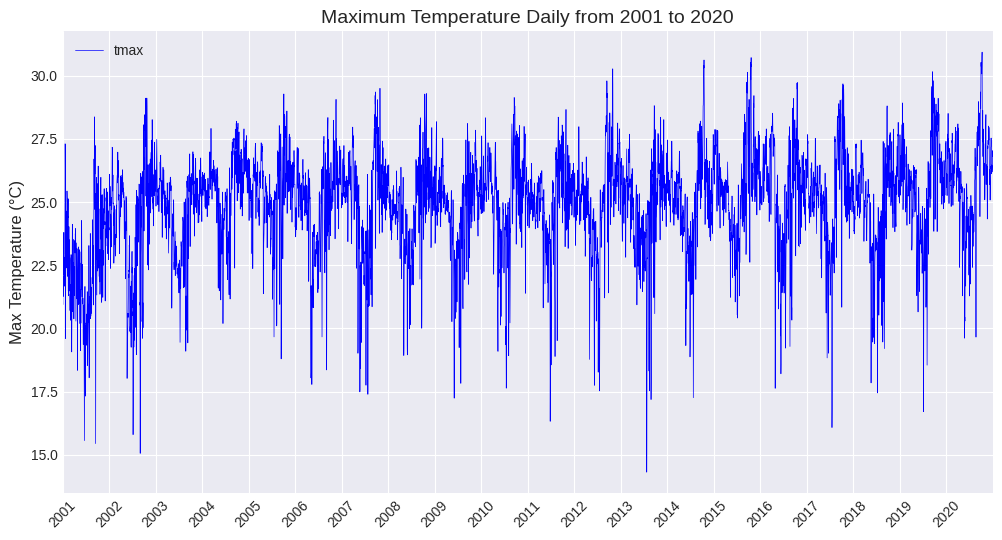

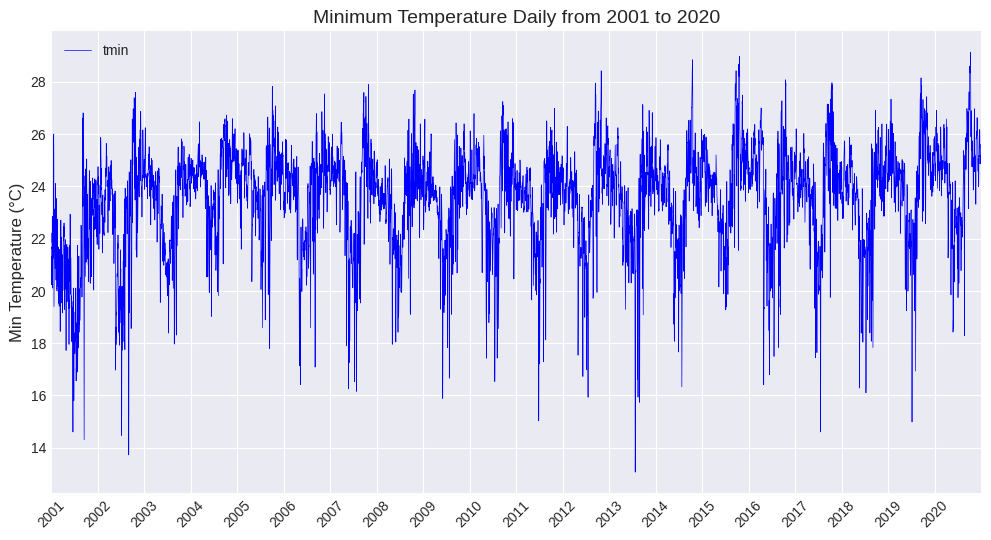

In [75]:
temp_daily["date"] = pd.to_datetime(temp_daily["date"]) 

# tmax
plt.figure(figsize=(12, 6))
sns.lineplot(x=temp_daily["date"], y=temp_daily["tmax"], label="tmax", color="b", linewidth=0.5)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Maximum Temperature Daily from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)
plt.savefig('graph/temperature/daily/tmax_daily.png')

# tmin
plt.figure(figsize=(12, 6))
sns.lineplot(x=temp_daily["date"], y=temp_daily["tmin"], label="tmin", color="b", linewidth=0.5)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Minimum Temperature Daily from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Min Temperature (°C)", fontsize=12)
plt.grid(True)
plt.savefig('graph/temperature/daily/tmin_daily.png')


##### Monthly:

In [72]:
temp_monthly = df[['date','dewp', 'tmax', 'tmin', 'dmax', 'dmin']]
temp_monthly['date'] = pd.to_datetime(temp_monthly['date'])
temp_monthly['date'] = temp_monthly['date'].dt.year.astype(str) + '-' + temp_monthly['date'].dt.month.astype(str)
temp_monthly['date'] = pd.to_datetime(temp_monthly['date'])
temp_monthly = temp_monthly.groupby(['date'], as_index=False)[['dewp', 'tmax', 'tmin', 'dmax', 'dmin']].mean()
temp_monthly.head()

/tmp/ipykernel_1441/2293818284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_monthly['date'] = pd.to_datetime(temp_monthly['date'])


/tmp/ipykernel_1441/2293818284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_monthly['date'] = temp_monthly['date'].dt.year.astype(str) + '-' + temp_monthly['date'].dt.month.astype(str)
/tmp/ipykernel_1441/2293818284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_monthly['date'] = pd.to_datetime(temp_monthly['date'])


abbreviation,date,dewp,tmax,tmin,dmax,dmin
0,2001-01-01,15.660618,22.977554,21.881183,16.431720,15.242876
1,2001-02-01,15.532440,23.113095,21.708036,16.258631,14.779911
2,2001-03-01,16.825269,21.687769,20.515323,17.349866,16.316667
3,2001-04-01,14.861389,22.274583,21.084722,15.455417,14.317778
4,2001-05-01,14.397764,22.020427,20.780793,15.573882,14.557825


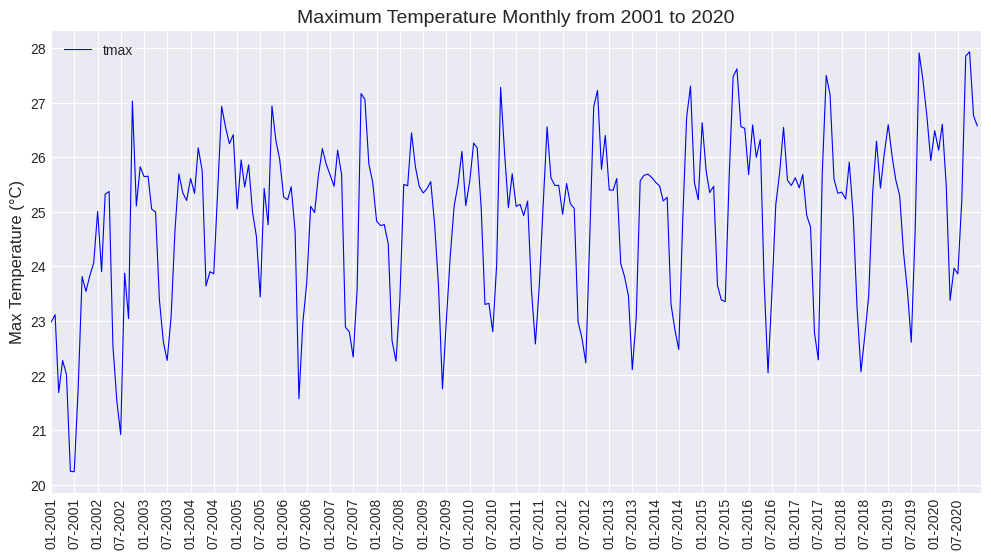

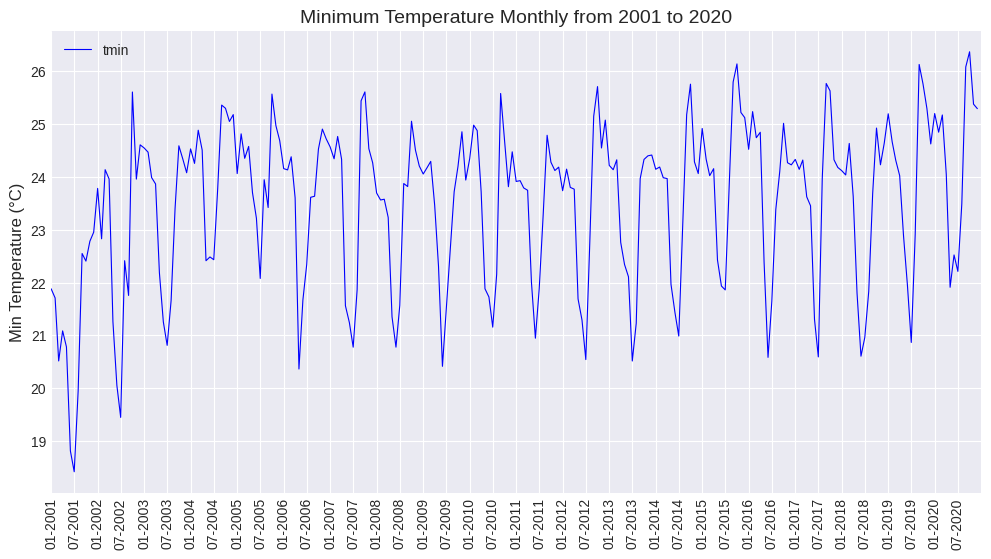

In [77]:
# tmax
plt.figure(figsize=(12, 6))
sns.lineplot(x=temp_monthly["date"], y=temp_monthly["tmax"], label="tmax", color="b", linewidth=0.8)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.title("Maximum Temperature Monthly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)
plt.savefig('graph/temperature/monthly/tmax_monthly.png')

# tmin
plt.figure(figsize=(12, 6))
sns.lineplot(x=temp_monthly["date"], y=temp_monthly["tmin"], label="tmin", color="b", linewidth=0.8)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.title("Minimum Temperature Monthly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Min Temperature (°C)", fontsize=12)
plt.grid(True)
plt.savefig('graph/temperature/monthly/tmin_monthly.png')


##### Yearly:

In [81]:
temp_yearly = df[['date', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin']]
temp_yearly['date'] = pd.to_datetime(temp_yearly['date'])
temp_yearly['date'] = pd.to_datetime(temp_yearly['date'].dt.year, format='%Y')
temp_yearly = temp_yearly.groupby(['date'], as_index=False)[['dewp', 'tmax', 'tmin', 'dmax', 'dmin']].mean()
temp_yearly

/tmp/ipykernel_1441/3796046732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_yearly['date'] = pd.to_datetime(temp_yearly['date'])
/tmp/ipykernel_1441/3796046732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_yearly['date'] = pd.to_datetime(temp_yearly['date'].dt.year, format='%Y')


abbreviation,date,dewp,tmax,tmin,dmax,dmin
0,2001-01-01,15.100600,22.877883,21.597975,15.680516,14.620725
1,2002-01-01,15.683293,24.195419,22.894015,16.236125,15.118682
2,2003-01-01,17.394270,24.442754,23.240249,17.681670,16.660711
3,2004-01-01,18.475072,25.484051,24.180050,18.914139,17.992607
4,2005-01-01,18.275685,25.384881,24.112242,18.689696,17.681323
5,2006-01-01,17.459002,24.932310,23.719629,17.795472,16.840912
6,2007-01-01,16.506694,25.014883,23.593072,17.112455,16.071433
7,2008-01-01,16.929482,24.678744,23.290351,17.475887,16.328921
8,2009-01-01,18.409770,24.616303,23.288167,18.918694,17.842385
9,2010-01-01,16.591353,25.049213,23.612405,17.182384,16.075716


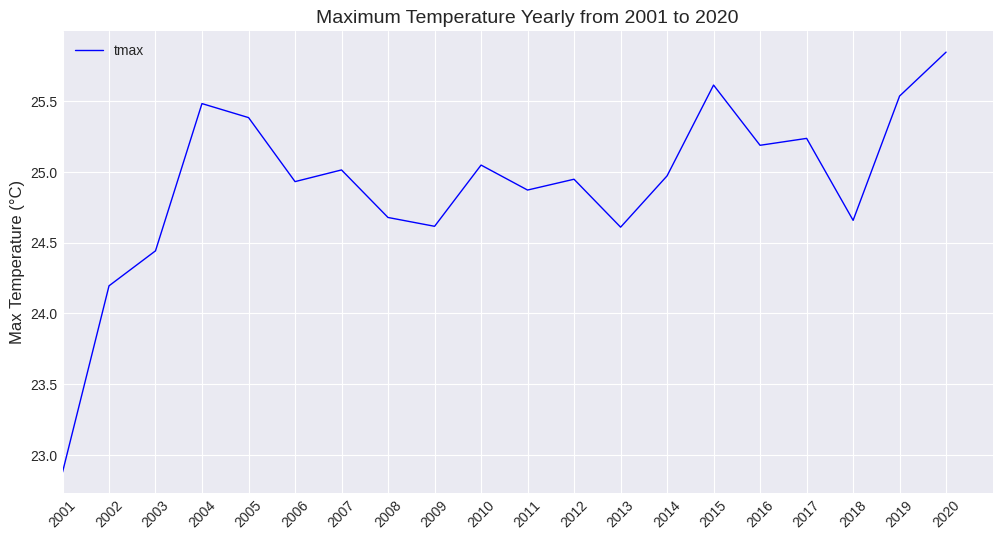

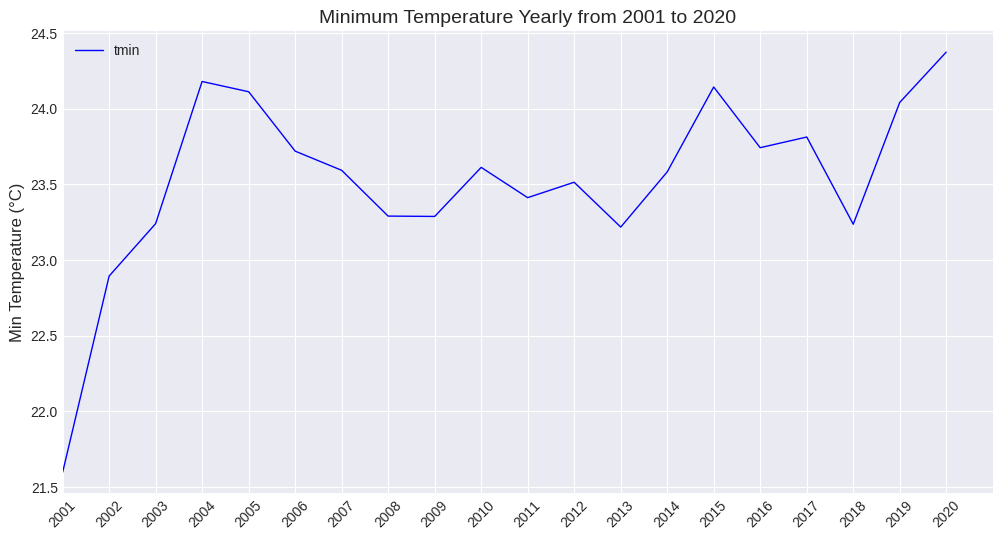

In [82]:
# tmax
plt.figure(figsize=(12, 6))
sns.lineplot(x=temp_yearly["date"], y=temp_yearly["tmax"], label="tmax", color="b", linewidth=1)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Maximum Temperature Yearly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)
plt.savefig('graph/temperature/yearly/tmax_yearly.png')

# tmin
plt.figure(figsize=(12, 6))
sns.lineplot(x=temp_yearly["date"], y=temp_yearly["tmin"], label="tmin", color="b", linewidth=1)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Minimum Temperature Yearly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Min Temperature (°C)", fontsize=12)
plt.grid(True)
plt.savefig('graph/temperature/yearly/tmin_yearly.png')


##### b. Rain

##### Daily:

In [85]:
rain_daily = df[['date', 'prcp']]
rain_daily['date'] = pd.to_datetime(rain_daily['date'])
rain_daily = rain_daily.groupby(['date'], as_index=False)['prcp'].mean()
rain_daily

/tmp/ipykernel_1441/4149643624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_daily['date'] = pd.to_datetime(rain_daily['date'])


,date,prcp
0,2001-01-01,1.416667
1,2001-01-02,1.183333
2,2001-01-03,0.016667
3,2001-01-04,0.291667
4,2001-01-05,0.000000
...,...,...
7300,2020-12-27,0.187500
7301,2020-12-28,0.172442
7302,2020-12-29,0.138670
7303,2020-12-30,0.195760


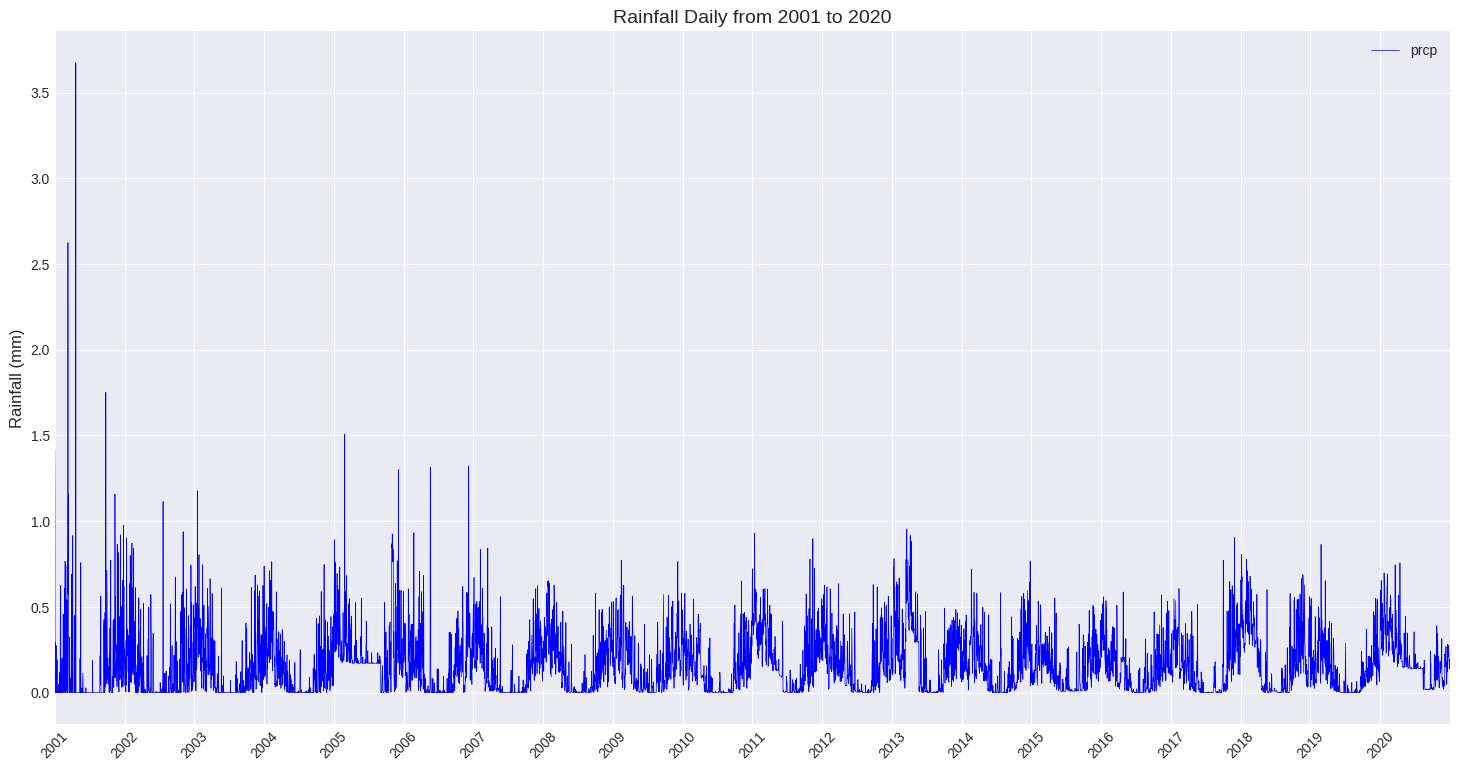

In [94]:
plt.figure(figsize=(18, 9))
sns.lineplot(x=rain_daily["date"], y=rain_daily["prcp"], label="prcp", color="b", linewidth=0.5)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Rainfall Daily from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Rainfall (mm)", fontsize=12)
plt.grid(True)
plt.savefig('graph/rain/rainfall_daily.png')


##### Monthly:

In [99]:
rain_monthly = df[['date', 'prcp']]
rain_monthly['date'] = pd.to_datetime(rain_monthly['date'])
rain_monthly['date'] = pd.to_datetime(rain_monthly['date'].dt.year.astype(str) + '-' + rain_monthly['date'].dt.month.astype(str))
rain_monthly = rain_monthly.groupby(['date'], as_index=False)['prcp'].mean()
rain_monthly

/tmp/ipykernel_1441/164804237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_monthly['date'] = pd.to_datetime(rain_monthly['date'])


/tmp/ipykernel_1441/164804237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_monthly['date'] = pd.to_datetime(rain_monthly['date'].dt.year.astype(str) + '-' + rain_monthly['date'].dt.month.astype(str))


,date,prcp
0,2001-01-01,0.136290
1,2001-02-01,0.146131
2,2001-03-01,0.270430
3,2001-04-01,0.196111
4,2001-05-01,0.036585
...,...,...
235,2020-08-01,0.091563
236,2020-09-01,0.040841
237,2020-10-01,0.111840
238,2020-11-01,0.106477


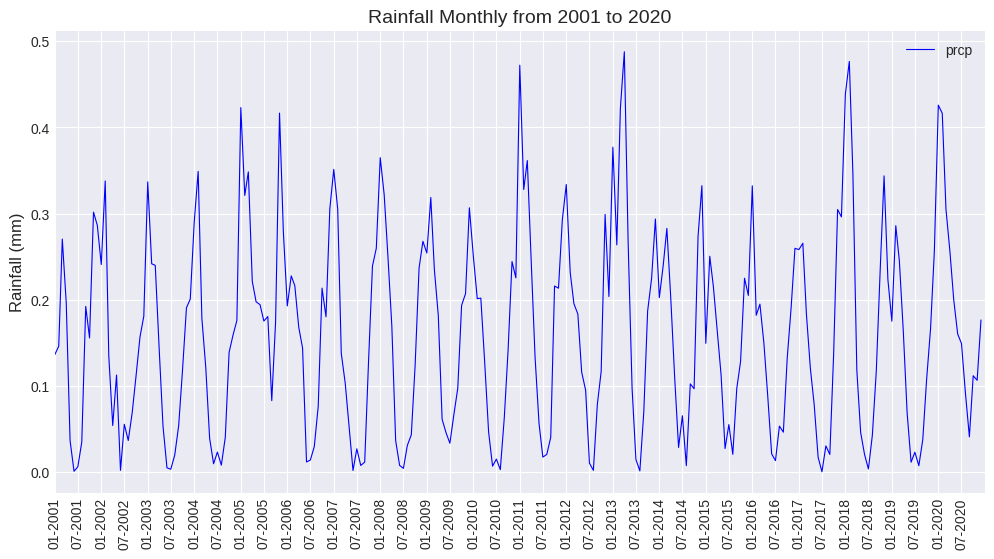

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=rain_monthly["date"], y=rain_monthly["prcp"], label="prcp", color="b", linewidth=0.8)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.title("Rainfall Monthly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Rainfall (mm)", fontsize=12)
plt.grid(True)
plt.savefig('graph/rain/rainfall_monthly.png')


##### Yearly:

In [103]:
rain_yearly = df[['date', 'prcp']]
rain_yearly['date'] = pd.to_datetime(rain_yearly['date'])
rain_yearly['date'] = pd.to_datetime(rain_yearly['date'].dt.year, format='%Y')
rain_yearly = rain_yearly.groupby(['date'], as_index=False)['prcp'].mean()
rain_yearly

/tmp/ipykernel_1441/1861896934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_yearly['date'] = pd.to_datetime(rain_yearly['date'])
/tmp/ipykernel_1441/1861896934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_yearly['date'] = pd.to_datetime(rain_yearly['date'].dt.year, format='%Y')


,date,prcp
0,2001-01-01,0.170016
1,2002-01-01,0.125530
2,2003-01-01,0.130511
3,2004-01-01,0.127015
4,2005-01-01,0.250903
5,2006-01-01,0.163916
6,2007-01-01,0.130547
7,2008-01-01,0.147226
8,2009-01-01,0.165906
9,2010-01-01,0.126977


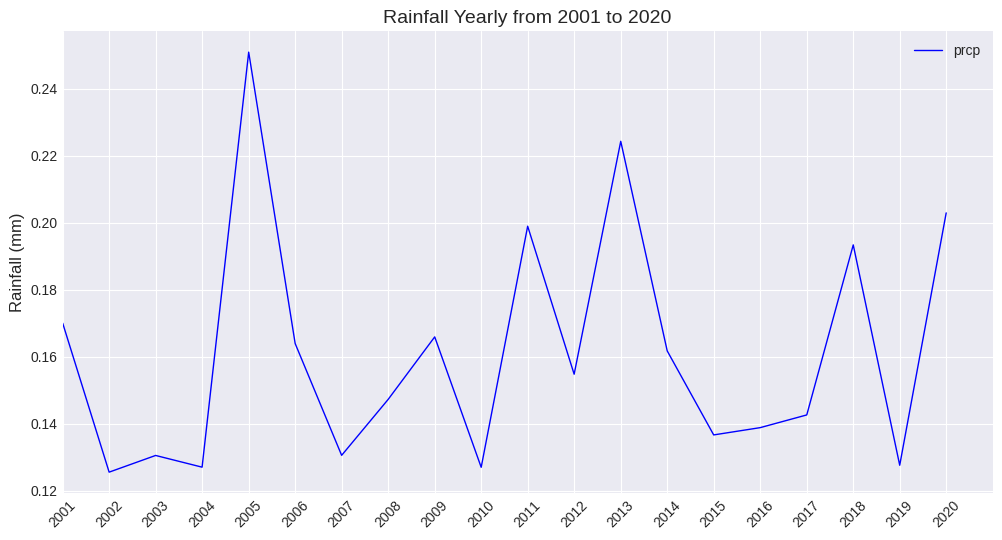

In [107]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=rain_yearly["date"], y=rain_yearly["prcp"], label="prcp", color="b", linewidth=1)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Rainfall Yearly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Rainfall (mm)", fontsize=12)
plt.grid(True)
plt.savefig('graph/rain/rainfall_yearly.png')

##### c. Humidity

##### Daily:

In [109]:
humid_daily = df[['date', 'hmax', 'hmin']]
humid_daily['date'] = pd.to_datetime(humid_daily['date'])
humid_daily = humid_daily.groupby(['date'], as_index=False)[['hmax', 'hmin']].mean()
humid_daily

/tmp/ipykernel_1441/3262858811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humid_daily['date'] = pd.to_datetime(humid_daily['date'])


abbreviation,date,hmax,hmin
0,2001-01-01,91.916667,85.583333
1,2001-01-02,89.625000,85.666667
2,2001-01-03,82.333333,77.083333
3,2001-01-04,85.041667,78.750000
4,2001-01-05,78.958333,73.916667
...,...,...,...
7300,2020-12-27,75.460161,69.184576
7301,2020-12-28,75.445541,69.358918
7302,2020-12-29,73.357822,66.893640
7303,2020-12-30,72.155336,65.471126


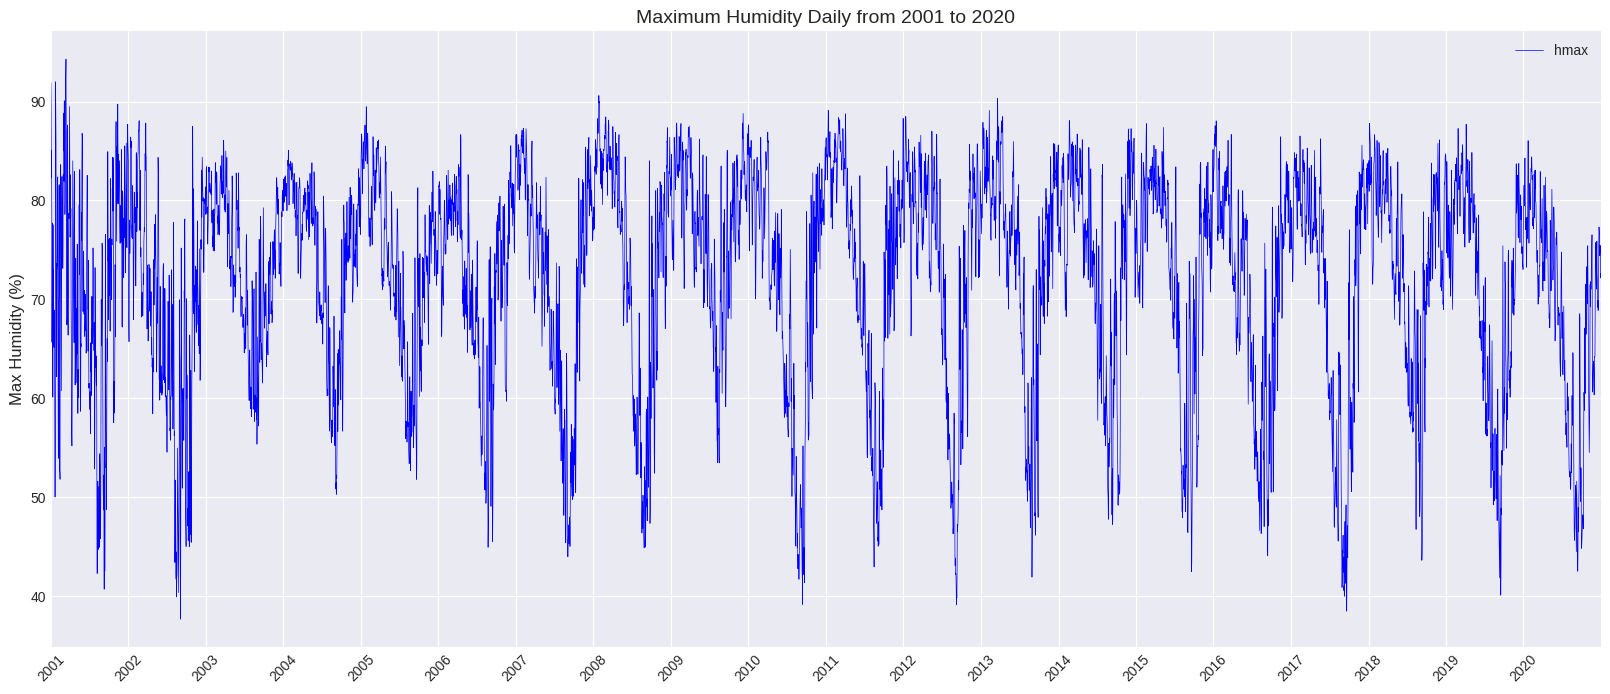

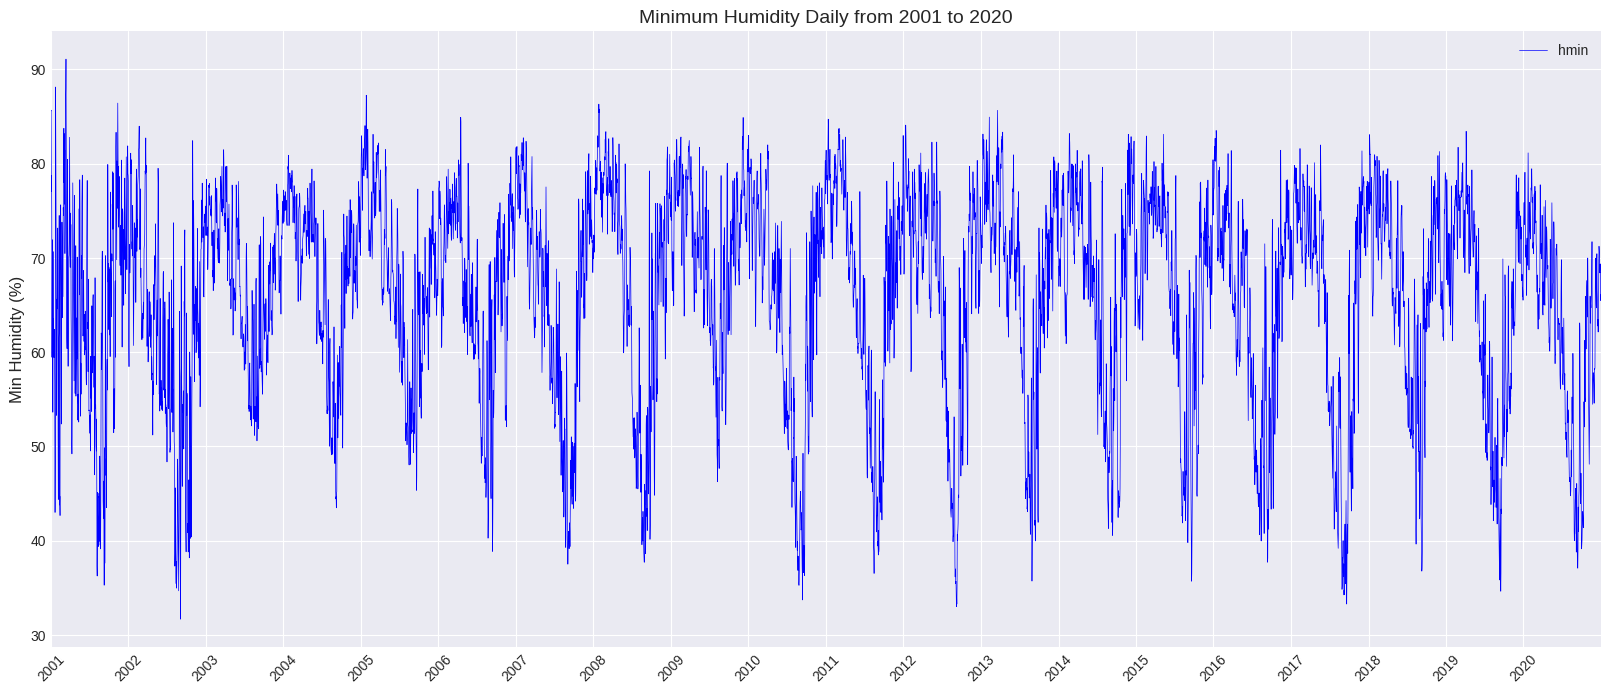

In [116]:
# hmax
plt.figure(figsize=(20, 8))
sns.lineplot(x=humid_daily["date"], y=humid_daily["hmax"], label="hmax", color="b", linewidth=0.5)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Maximum Humidity Daily from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Max Humidity (%)", fontsize=12)
plt.grid(True)
plt.savefig('graph/humidity/daily/hmax_daily.png')

# hmin
plt.figure(figsize=(20, 8))
sns.lineplot(x=humid_daily["date"], y=humid_daily["hmin"], label="hmin", color="b", linewidth=0.5)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Minimum Humidity Daily from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Min Humidity (%)", fontsize=12)
plt.grid(True)
plt.savefig('graph/humidity/daily/hmin_daily.png')


##### Monthly:

In [115]:
humid_monthly = df[['date','hmax','hmin']]
humid_monthly['date'] = pd.to_datetime(humid_monthly['date'])
humid_monthly['date'] = pd.to_datetime(humid_monthly['date'].dt.year.astype(str) + '-' + humid_monthly['date'].dt.month.astype(str))
humid_monthly = humid_monthly.groupby(['date'], as_index=False)[['hmax', 'hmin']].mean()
humid_monthly

/tmp/ipykernel_1441/1397961626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humid_monthly['date'] = pd.to_datetime(humid_monthly['date'])
/tmp/ipykernel_1441/1397961626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humid_monthly['date'] = pd.to_datetime(humid_monthly['date'].dt.year.astype(str) + '-' + humid_monthly['date'].dt.month.astype(str))


abbreviation,date,hmax,hmin
0,2001-01-01,72.005376,65.448925
1,2001-02-01,72.110119,63.785714
2,2001-03-01,81.586022,74.818548
3,2001-04-01,70.593056,63.994444
4,2001-05-01,72.593496,65.807927
...,...,...,...
235,2020-08-01,54.116959,48.527731
236,2020-09-01,50.572088,44.931189
237,2020-10-01,60.775832,55.108246
238,2020-11-01,65.220760,59.208077


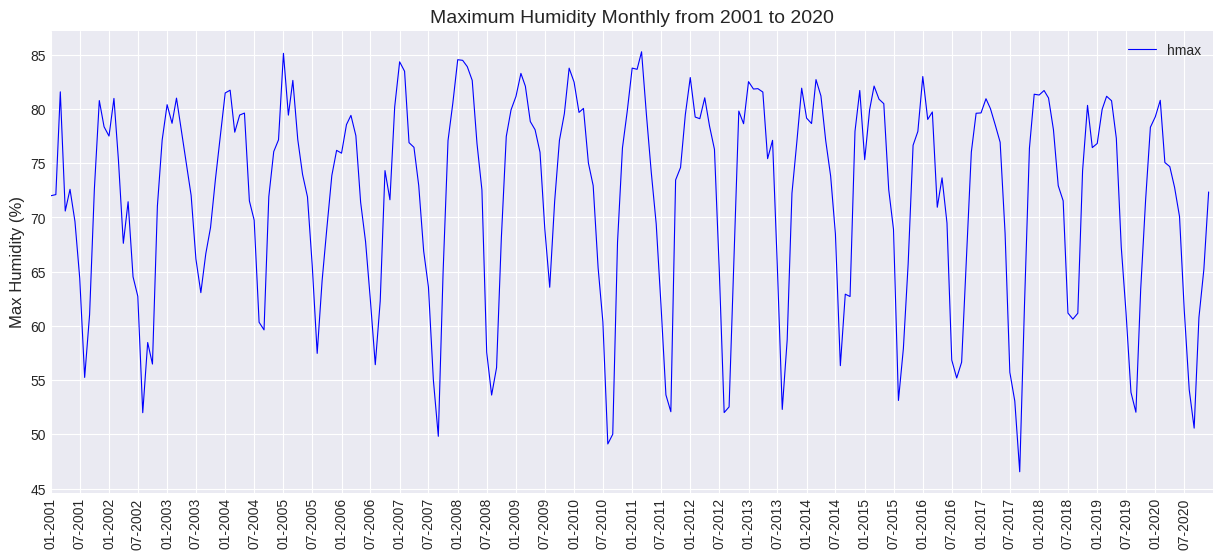

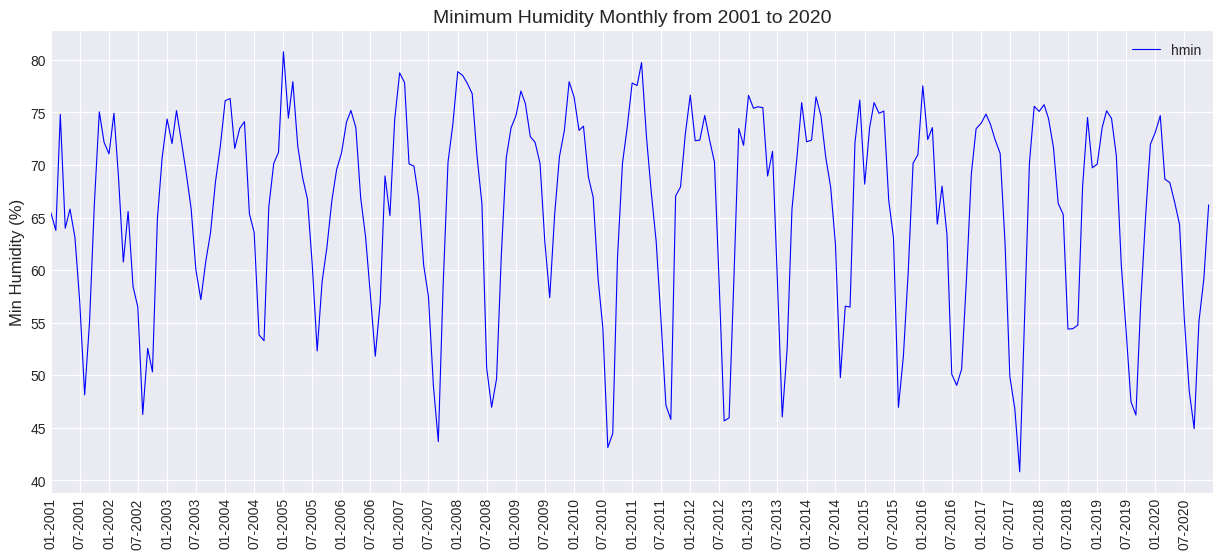

In [119]:
# hmax
plt.figure(figsize=(15, 6))
sns.lineplot(x=humid_monthly["date"], y=humid_monthly["hmax"], label="hmax", color="b", linewidth=0.8)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.title("Maximum Humidity Monthly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Max Humidity (%)", fontsize=12)
plt.grid(True)
plt.savefig('graph/humidity/monthly/hmax_monthly.png')

# hmin
plt.figure(figsize=(15, 6))
sns.lineplot(x=humid_monthly["date"], y=humid_monthly["hmin"], label="hmin", color="b", linewidth=0.8)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.title("Minimum Humidity Monthly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Min Humidity (%)", fontsize=12)
plt.grid(True)
plt.savefig('graph/humidity/monthly/hmin_monthly.png')


##### Yearly:

In [120]:
humid_yearly = df[['date', 'hmax', 'hmin']]
humid_yearly['date'] = pd.to_datetime(humid_yearly['date'])
humid_yearly['date'] = pd.to_datetime(humid_yearly['date'].dt.year, format='%Y')
humid_yearly = humid_yearly.groupby(['date'], as_index=False)[['hmax', 'hmin']].mean()
humid_yearly

/tmp/ipykernel_1441/2121580325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humid_yearly['date'] = pd.to_datetime(humid_yearly['date'])
/tmp/ipykernel_1441/2121580325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humid_yearly['date'] = pd.to_datetime(humid_yearly['date'].dt.year, format='%Y')


abbreviation,date,hmax,hmin
0,2001-01-01,71.041124,64.641963
1,2002-01-01,68.235776,62.044570
2,2003-01-01,73.292545,67.445976
3,2004-01-01,73.860981,67.910470
4,2005-01-01,73.009059,67.514367
5,2006-01-01,72.083530,66.986240
6,2007-01-01,70.202221,63.903158
7,2008-01-01,72.341103,66.006630
8,2009-01-01,76.953456,70.794699
9,2010-01-01,69.866348,63.745327


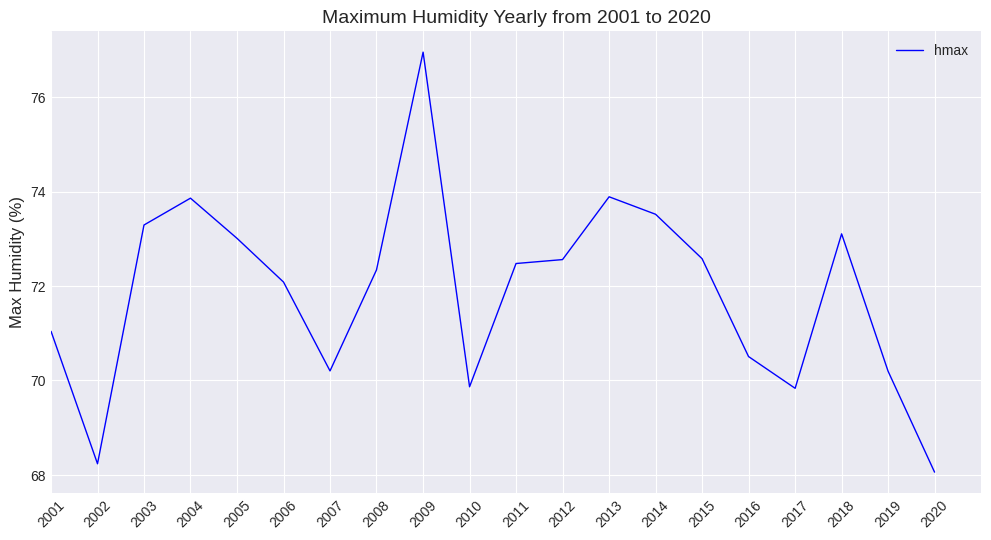

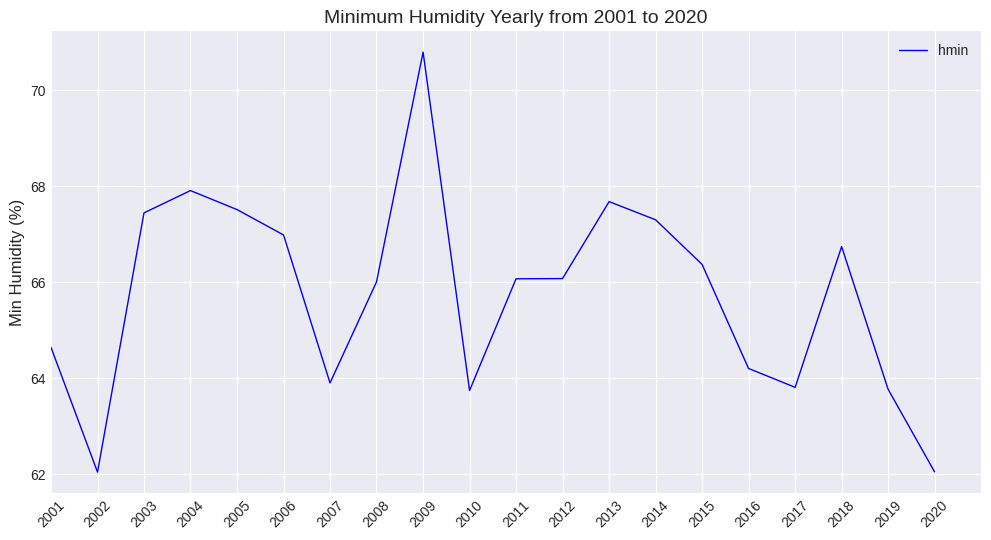

In [121]:
# hmax
plt.figure(figsize=(12, 6))
sns.lineplot(x=humid_yearly["date"], y=humid_yearly["hmax"], label="hmax", color="b", linewidth=1)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Maximum Humidity Yearly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Max Humidity (%)", fontsize=12)
plt.grid(True)
plt.savefig('graph/humidity/yearly/hmax_yearly.png')

# tmin
plt.figure(figsize=(12, 6))
sns.lineplot(x=humid_yearly["date"], y=humid_yearly["hmin"], label="hmin", color="b", linewidth=1)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  
plt.title("Minimum Humidity Yearly from 2001 to 2020", fontsize=14)
plt.xlabel(None)
plt.ylabel("Min Humidity (%)", fontsize=12)
plt.grid(True)
plt.savefig('graph/humidity/yearly/hmin_yearly.png')
